In [3]:
# packages for analysis 
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.model_selection import train_test_split

#package for visual
import matplotlib.pyplot as plt
import seaborn as sns

#Allows charts to appear in the notebook
%matplotlib inline

#pickle package
import pickle

# operating system
import os
os.getcwd()

'C:\\Users\\ISAAC'

In [4]:
# Reading data from excel  "sp=students performance"
sp=pd.read_excel("StudentsPerformance1.xlsx")

In [5]:
sp.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
sp.drop(['parental_level_of_education', 'lunch', 'race/ethnicity', 'test_preparation_course'], axis=1, inplace=True)

In [7]:
sp.head()

,gender,math_score,reading_score,writing_score
0,female,72,72,74
1,female,69,90,88
2,female,90,95,93
3,male,47,57,44
4,male,76,78,75


In [8]:
sp.info() # checking for missing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   gender         1000 non-null   object
 1   math_score     1000 non-null   int64 
 2   reading_score  1000 non-null   int64 
 3   writing_score  1000 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 31.4+ KB


In [9]:
sp.gender.replace(['male','female'], ['1','0'], inplace=True) # Transforming the gender (sex) to numeric value

In [10]:
sp.head()

,gender,math_score,reading_score,writing_score
0,0,72,72,74
1,0,69,90,88
2,0,90,95,93
3,1,47,57,44
4,1,76,78,75


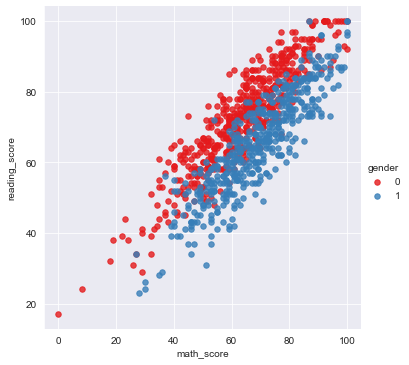

In [11]:
# plotting our data
sns.set_style("darkgrid")
sns.lmplot( x='math_score', y='reading_score', data=sp, hue='gender', fit_reg=False, palette='Set1', height=5, scatter_kws={"s":30})
plt.show()

In [12]:
# define the features and the target
X=sp.drop('gender', axis=1) # dropping gender
y=sp['gender']



In [13]:
X

,math_score,reading_score,writing_score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75
...,...,...,...
995,88,99,95
996,62,55,55
997,59,71,65
998,68,78,77


In [14]:
y

0      0
1      0
2      0
3      1
4      1
      ..
995    0
996    1
997    0
998    0
999    0
Name: gender, Length: 1000, dtype: object

In [17]:
# ============treating Outliers (capping and flooring)============================================================================#
#======Whatever value that is less than the lower limit will be considered as outlier. similarly, whatever value that is greater than 
#======the upper limit will considered as outlier=================================================================================#

lower_limit = sp['writing_score'].mean()-2*sp['writing_score'].std()
print(lower_limit)

upper_limit = sp['writing_score'].mean() + 2*sp['writing_score'].std()
print(upper_limit)


37.66268597826072
98.44531402173928


In [18]:
sp['writing_score']=np.where(sp['writing_score'] > upper_limit,                        
upper_limit, np.where(sp['writing_score']<lower_limit,
lower_limit, sp['writing_score']))

In [19]:
lower_limit = sp['reading_score'].mean()-2*sp['reading_score'].std()
print(lower_limit)

upper_limit = sp['reading_score'].mean() + 2*sp['reading_score'].std()
print(upper_limit)

39.96861612549556
98.36938387450444


In [20]:
sp['reading_score']=np.where(sp['reading_score'] > upper_limit,                        
upper_limit, np.where(sp['reading_score']<lower_limit,
lower_limit, sp['reading_score']))

In [21]:
lower_limit = sp['math_score'].mean()-2*sp['math_score'].std()
print(lower_limit)

upper_limit = sp['math_score'].mean() + 2*sp['math_score'].std()
print(upper_limit)

35.76283980798107
96.41516019201893


In [22]:
sp['math_score']=np.where(sp['math_score'] > upper_limit,                        
upper_limit, np.where(sp['math_score']<lower_limit,
lower_limit, sp['math_score']))

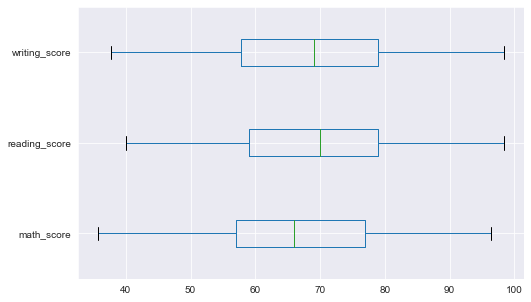

In [23]:
# Outlier Checks
plt.figure(figsize=(8,5))
sp.boxplot(vert=0)
plt.show()

In [24]:
sp.describe() # EDD Extended data dictionary

,math_score,reading_score,writing_score
count,1000.000000,1000.000000,1000.000000
mean,66.272485,69.327572,68.220920
std,14.488649,14.072964,14.663567
min,35.762840,39.968616,37.662686
25%,57.000000,59.000000,57.750000
50%,66.000000,70.000000,69.000000
75%,77.000000,79.000000,79.000000
max,96.415160,98.369384,98.445314


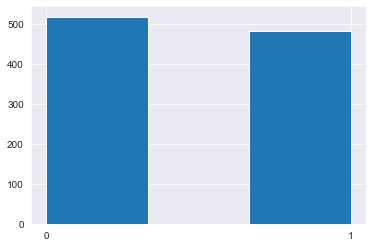

In [25]:
#plotting the output (y) classes   (0 rep female, 1 rep male)
plt.hist(y, bins=3)
plt.show()

In [26]:
#split the dataset into train and test using sklearn before building the SVM algorithm model
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.25, random_state=1) # 75% training and 25% test


In [27]:
# generating Model (building SVM model)
###########################################################################################################################
#Import the support vector classifier function or SVC function from Sklearn SVM module. Build the SVM model with the help # 
# of the SVC function#######################################################################################################

from sklearn import svm
from sklearn.svm import SVC

#Create a svm Classifier
classifier=svm.SVC(kernel='linear', random_state=1) #linear kernel

In [28]:
#Train the model using the training sets
classifier=classifier.fit(X_train, y_train)


In [29]:
# predict the response for test dataset
y_pred=classifier.predict(X_test)

In [30]:
# Evaluating the model (Let's estimate how accuracy the classifier or model can predict the gender of the students.)
# Accuracy can be computed by comparing actual test set values and predicted values.#

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

#Model Accuracy: how often is the classifier correct?
print("Accuracy on Test Set:", metrics.accuracy_score(y_test, y_pred))

Accuracy on Test Set: 0.872


In [33]:
# Well, a classification rate of 87.2% is considered  to be a very good accuracy.

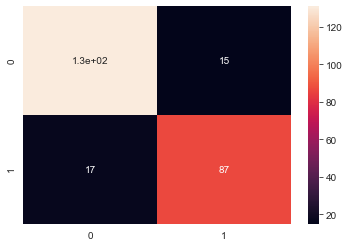

In [38]:
# Confusion Matrix
ConfusionMatrix=confusion_matrix(y_test, y_pred, labels=classifier.classes_)
sns.heatmap(ConfusionMatrix, annot=True)
plt.savefig('confusion.png')

In [35]:
# The output shows that 131 of the female class were classified correctly, and 87 of the male were classified correctly.

In [36]:
#Evaluating the support vector Machine Model
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.90      0.89       146
           1       0.85      0.84      0.84       104

    accuracy                           0.87       250
   macro avg       0.87      0.87      0.87       250
weighted avg       0.87      0.87      0.87       250



In [1]:
# Well, we got a precision  of 89% and recall of 87%, which are considered a very good values